In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

In [3]:
# train data 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# train data에 결측치가 보임. 전처리를 어떻게 할지 정하기 위해 기술통계 진행

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. PassengerId: 승객은 891명
2. Survived: 약 38%가 Survived
3. Pclass: 1, 2, 3등급이 있다
4. Age: 전체 평균은 약 30세, 최소 0.42세가 있고 최대 80세이며, 승객의 50%는 20세~ 38세 사이이다
5. SibSp: 전체의 약 50% 이상은 형제, 자매와 함께 타지 않았다. 가장 많이 함께 탄 사람은 8명과 함께.
6. Parch: 전체의 약 75% 이상은 부모, 자녀와 함께 타지 않았다. 가장 많이 함께 탄 사람은 6명과 함께.
7. Fare: 운임은 평균 약 32달러, 최소 0달러, 최대 약 512달러이며, 승객의 75%는 31달러 이하를 지불했다.

## Survived

In [28]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

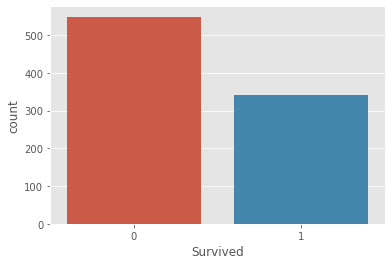

In [13]:
sns.countplot(data = df_train, x = 'Survived')
plt.show()

- Survived 342명(약 38%), 반대는 549명(약 62%)

## Pclass와 Survived

In [11]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

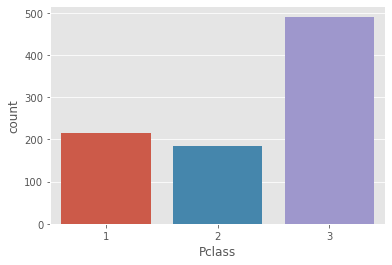

In [12]:
sns.countplot(data = df_train, x = 'Pclass')
plt.show()

In [25]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- 탑승객 수는 3, 1, 2순으로 많으며
- Survived 비율은 1, 2, 3순으로 많다

## Sex와 Survived

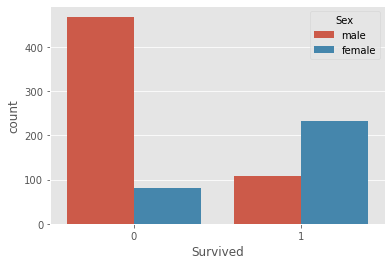

In [17]:
sns.countplot(data = df_train, x = 'Survived', hue = 'Sex')
plt.show()

In [34]:
round(df_train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean(), 2)

,Sex,Survived
0,female,0.74
1,male,0.19


- 여성 약 74%, 남성 약 19% 생존

## Age와 Survived

In [35]:
df_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

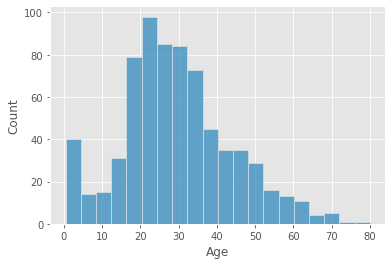

In [37]:
sns.histplot(data = df_train['Age'])
plt.show()

- 영/유아의 비율이 의외로 높음
- 연령대 정리 필요함: ~ 10, ~20, ~30, ~40, ~50, 50 ~

In [47]:
# 이어서 계속,,,,,